# CNN

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms

# Normalise data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [17]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.conv3 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, 3)
        self.conv5 = nn.Conv2d(64, 64, 3)
        self.conv6 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(2 * 2 * 64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Input - 32 * 32
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        # Output 30 * 30 * 32
        x = self.pool(x)
        # Output 15 * 15 * 32
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv6(x))
        # Output 13 * 13 * 64
        x = self.pool(x)
        # Output 6 * 6 * 64
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv6(x))
        # Output 4 * 4 * 64
        x = self.pool(x)
        # Output 2 * 2 * 64
        x = x.view(-1, 2 * 2 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

net.to(device)
print(net.conv1.bias.get_device())

cuda:0
0


In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
epoch_num = 15
epochs = []
losses = []
for epoch in range(epoch_num):  # loop over the dataset multiple times
    total_loss = 0
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0
    
    epochs.append(epoch)
    losses.append(total_loss / 1563)


[1,   500] loss: 1.995
[1,  1000] loss: 1.718
[1,  1500] loss: 1.533
[2,   500] loss: 1.379
[2,  1000] loss: 1.292
[2,  1500] loss: 1.202
[3,   500] loss: 1.099
[3,  1000] loss: 1.083
[3,  1500] loss: 1.020
[4,   500] loss: 0.954
[4,  1000] loss: 0.928
[4,  1500] loss: 0.933
[5,   500] loss: 0.840
[5,  1000] loss: 0.851
[5,  1500] loss: 0.849
[6,   500] loss: 0.777
[6,  1000] loss: 0.787
[6,  1500] loss: 0.781
[7,   500] loss: 0.716
[7,  1000] loss: 0.728
[7,  1500] loss: 0.750
[8,   500] loss: 0.686
[8,  1000] loss: 0.704
[8,  1500] loss: 0.687
[9,   500] loss: 0.626
[9,  1000] loss: 0.662
[9,  1500] loss: 0.678
[10,   500] loss: 0.604
[10,  1000] loss: 0.630
[10,  1500] loss: 0.638
[11,   500] loss: 0.580
[11,  1000] loss: 0.598
[11,  1500] loss: 0.617
[12,   500] loss: 0.548
[12,  1000] loss: 0.588
[12,  1500] loss: 0.593
[13,   500] loss: 0.537
[13,  1000] loss: 0.573
[13,  1500] loss: 0.565
[14,   500] loss: 0.505
[14,  1000] loss: 0.559
[14,  1500] loss: 0.556
[15,   500] loss: 0

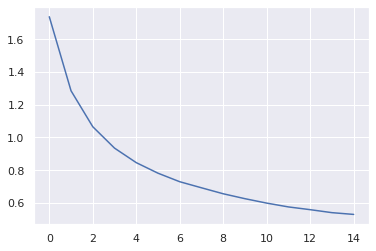

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(epochs, losses)

In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {correct / total * 100:.1f}%")

Accuracy of the network on the 10000 test images: 74.1%


In [ ]:
PATH = './tensorFlow.pth'
torch.save(net.state_dict(), PATH)